In [ ]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping


In [ ]:
df=pd.read_csv("/content/ABBANK.csv",parse_dates=['DATE'])
df.head()

,#,DATE,TRADING CODE,LTP*,HIGH,LOW,OPENP*,CLOSEP*,YCP,TRADE,VALUE (mn),VOLUME
0,439,2018-05-08,DHAKABANK,14.3,14.7,14.0,14.3,14.3,14.2,538.0,30.013,2088763.0
1,438,2018-06-08,DHAKABANK,13.6,14.2,13.5,14.1,13.7,14.3,625.0,45.679,3316895.0
2,437,2018-07-08,DHAKABANK,13.8,14.1,13.6,13.9,13.9,13.7,464.0,30.636,2199851.0
3,436,2018-08-08,DHAKABANK,14.3,14.6,13.8,13.9,14.4,13.9,675.0,48.724,3426870.0
4,435,2018-09-08,DHAKABANK,14.8,15.1,14.5,14.6,14.9,14.4,868.0,70.769,4772611.0


In [ ]:
# Sort DataFrame by date
df = df.sort_values('DATE')

# Double check the result
df.head()


,#,DATE,TRADING CODE,LTP*,HIGH,LOW,OPENP*,CLOSEP*,YCP,TRADE,VALUE (mn),VOLUME
36,403,2018-01-10,DHAKABANK,14.3,14.4,14.2,14.2,14.3,14.3,183.0,10.302,720101.0
59,380,2018-01-11,DHAKABANK,14.1,14.3,14.1,14.2,14.2,14.3,109.0,7.905,555214.0
37,402,2018-02-10,DHAKABANK,14.5,14.5,14.2,14.3,14.4,14.3,188.0,14.376,1001308.0
79,360,2018-02-12,DHAKABANK,14.2,14.3,14.0,14.1,14.0,14.1,199.0,9.782,692390.0
16,423,2018-03-09,DHAKABANK,15.8,16.6,15.6,16.4,15.9,16.5,713.0,70.583,4386733.0


In [ ]:
df['daily_ret'] = df['CLOSEP*'].pct_change()
df['daily_ret'] = df['daily_ret'].fillna(0.0)

In [ ]:
df['volatility']= df['daily_ret'].rolling(window=21).std()
df['volatility'] = df['volatility'].fillna(0.0)


In [ ]:
df['volatility'] = df['volatility']*100

In [ ]:
import matplotlib.pyplot as plt 

In [ ]:
df=df.reset_index()['volatility']

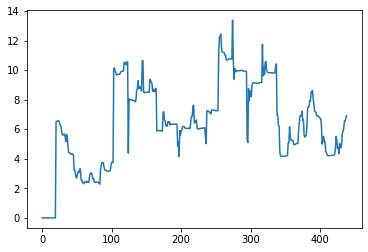

In [ ]:
plt.plot(df)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [ ]:
##splitting dataset into train and test split where train=70 percent and test=30 percent
training_size=int(len(df)*0.70)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]




In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [],[]
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:

# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:

print(X_train.shape), print(y_train.shape)

(206, 100)
(206,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:

X_test.shape


(31, 100, 1)

In [ ]:


filepath1 = "/content/drive/MyDrive/StockPriceEnsembleDL/modelsAbbank/model1.h5"
filepath2 = "/content/drive/MyDrive/StockPriceEnsembleDL/modelsAbbank/model2.h5"
filepath3 = "/content/drive/MyDrive/StockPriceEnsembleDL/modelsAbbank/model3.h5"


In [ ]:

#1D cnn model
# define model
model1 = Sequential()
model1.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(100,1)))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(50, activation='relu'))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mse')
model1.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)


Epoch 1/100
7/7 [==============================] - 1s 76ms/step - loss: 0.1605 - val_loss: 0.0172
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0329 - val_loss: 0.0368
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0222 - val_loss: 0.0293
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0187 - val_loss: 0.0200
Epoch 5/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0182 - val_loss: 0.0296
Epoch 6/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0110 - val_loss: 0.0204
Epoch 7/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0107 - val_loss: 0.0239
Epoch 8/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0086 - val_loss: 0.0193
Epoch 9/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0094 - val_loss: 0.0157
Epoch 10/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0066 - val_loss: 0.0136
Epoch 11/100
7/7 [====

In [ ]:
model1.save(filepath1)

In [ ]:
#LSTM  model
model2=Sequential()
model2.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model2.add(LSTM(50,return_sequences=True))
model2.add(LSTM(50))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error', optimizer='adam')
model2.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
7/7 [==============================] - 6s 309ms/step - loss: 0.2421 - val_loss: 0.1102
Epoch 2/100
7/7 [==============================] - 1s 140ms/step - loss: 0.0580 - val_loss: 0.0065
Epoch 3/100
7/7 [==============================] - 1s 132ms/step - loss: 0.0337 - val_loss: 0.0210
Epoch 4/100
7/7 [==============================] - 1s 136ms/step - loss: 0.0178 - val_loss: 0.0354
Epoch 5/100
7/7 [==============================] - 1s 130ms/step - loss: 0.0160 - val_loss: 0.0134
Epoch 6/100
7/7 [==============================] - 1s 127ms/step - loss: 0.0154 - val_loss: 0.0258
Epoch 7/100
7/7 [==============================] - 1s 126ms/step - loss: 0.0156 - val_loss: 0.0230
Epoch 8/100
7/7 [==============================] - 1s 132ms/step - loss: 0.0158 - val_loss: 0.0171
Epoch 9/100
7/7 [==============================] - 1s 131ms/step - loss: 0.0130 - val_loss: 0.0248
Epoch 10/100
7/7 [==============================] - 1s 124ms/step - loss: 0.0151 - val_loss: 0.0181
Epoch 11/

In [ ]:
model2.save(filepath2)

In [ ]:
#BILSTM model
model3=Sequential()
model3.add(Bidirectional(LSTM(50,return_sequences=True,input_shape=(100,1))))
model3.add(Bidirectional(LSTM(50,return_sequences=True)))
model3.add(Bidirectional(LSTM(50)))
model3.add(Dense(1))
model3.compile(loss='mean_squared_error', optimizer='adam')
model3.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
7/7 [==============================] - 13s 551ms/step - loss: 0.1837 - val_loss: 0.0931
Epoch 2/100
7/7 [==============================] - 2s 228ms/step - loss: 0.0374 - val_loss: 0.0078
Epoch 3/100
7/7 [==============================] - 2s 236ms/step - loss: 0.0248 - val_loss: 0.0631
Epoch 4/100
7/7 [==============================] - 2s 225ms/step - loss: 0.0228 - val_loss: 0.0179
Epoch 5/100
7/7 [==============================] - 2s 258ms/step - loss: 0.0171 - val_loss: 0.0126
Epoch 6/100
7/7 [==============================] - 2s 215ms/step - loss: 0.0148 - val_loss: 0.0219
Epoch 7/100
7/7 [==============================] - 2s 217ms/step - loss: 0.0123 - val_loss: 0.0085
Epoch 8/100
7/7 [==============================] - 1s 211ms/step - loss: 0.0122 - val_loss: 0.0100
Epoch 9/100
7/7 [==============================] - 1s 213ms/step - loss: 0.0119 - val_loss: 0.0074
Epoch 10/100
7/7 [==============================] - 1s 212ms/step - loss: 0.0092 - val_loss: 0.0055
Epoch 11

In [ ]:
model3.save(filepath3)

In [ ]:
from keras.models import load_model

In [ ]:
# create list of loaded models use  load_model() 
all_models = list()
for i in range(3):
  filename = '/content/drive/MyDrive/StockPriceEnsembleDL/modelsAbba/model'+str(i+1)+'.h5'
  model = load_model(filename)
  all_models.append(model)

In [ ]:
print(len(all_models))

3


In [ ]:
# perform test prediction with per models 
#model1
f1 = '/content/drive/MyDrive/StockPriceEnsembleDL/modelsUttarabank/model1.h5'
model = load_model(f1)


In [ ]:

test_preds = model.predict(X_test)
print(test_preds.shape)
print(type(test_preds))

(31, 1)
<class 'numpy.ndarray'>


In [ ]:
test_preds = np.reshape(test_preds,(1, test_preds.size))
test_predict=scaler.inverse_transform(test_preds)
X = np.reshape(ytest,(1, ytest.size))
Y_test =scaler.inverse_transform(X)

In [ ]:

#Y_test = Y_test.transpose()
RMSE = math.sqrt(mean_squared_error(Y_test,test_preds))
RMSE

4.4802240241502345

In [ ]:

# stacked generalization with linear meta model on blobs dataset
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from keras.models import load_model
from keras.utils import to_categorical
from numpy import dstack

In [ ]:
def DataPrep(datax):
  test_preds = np.reshape(datax,(1, datax.size))
  test_predict=scaler.inverse_transform(test_preds)
  return datax



In [ ]:
def stacked_dataset(allModels, inputX):
	stackX = None
	for model in allModels:
		# make prediction
		yhat = model.predict(inputX, verbose=0)
		# stack predictions into [rows, members, probabilities]
		if stackX is None:
			stackX = yhat
		else:
			stackX = dstack((stackX, yhat))
	# flatten predictions to [rows, members x probabilities]
	
	return stackX

In [ ]:
# fit a model based on the outputs from the ensemble members
def fit_stacked_model(members, inputX, inputy):
	# create dataset using ensemble
	stackedX = stacked_dataset(members, inputX)
	# fit standalone model
	model = LinearRegression()
	model.fit(stackedX, inputy)
	return model

In [ ]:

#make prediction with stacked model

def stacked_prediction(members, model, inputX):
  #inputX = DataPrep(inputX)
	stackedX = stacked_dataset(members,inputX)
	# make a prediction
	yhat = model.predict(stackedX)
	return yhat


In [ ]:

#started from here
for i in range(len(all_models)):
	model = all_models[i]
	for layer in model.layers:
		# make not trainable
		layer.trainable = False
		# rename to avoid 'unique layer name' issue
		layer._name = 'ensemble_' + str(i+1) + '_' + layer.name


In [ ]:

# define stacked model from multiple member input models
def define_stacked_model(members):
	# update all layers in all models to not be trainable
	for i in range(len(members)):
		model = members[i]
		for layer in model.layers:
			# make not trainable
			layer.trainable = False
			# rename to avoid 'unique layer name' issue
			layer._name = 'ensemble_' + str(i+1) + '_' + layer.name
	# define multi-headed input
	ensemble_visible = [model.input for model in members]
	# concatenate merge output from each model
	ensemble_outputs = [model.output for model in members]
	merge = concatenate(ensemble_outputs)
	hidden = Dense(10, activation='relu')(merge)
	output = Dense(3)(hidden)
	model = Model(inputs=ensemble_visible, outputs=output)
	model = Model(inputs=ensemble_visible, outputs=output)
	# plot graph of ensemble
	plot_model(model, show_shapes=True, to_file='model_graph.png')
	# compile
	# compile
	model.compile(optimizer='adam', loss='mse')
	return model

In [ ]:

def fit_stacked_model(model, inputX, inputy):
	# prepare input data
	X = [inputX for _ in range(len(model.input))]
	# encode output data
	#inputy_enc = to_categorical(inputy)
	# fit model
	model.fit(X, inputy, epochs=300, verbose=0)

In [ ]:
stacked_model = define_stacked_model(all_models)

In [ ]:
#fit stacked model on test dataset
fit_stacked_model(stacked_model, X_test,ytest)

In [ ]:

def predict_stacked_model(model, inputX):
	# prepare input data
	X = [inputX for _ in range(len(model.input))]
	# make prediction
	return model.predict(X)

In [ ]:

# make predictions and evaluate
yhat = predict_stacked_model(stacked_model, X_test)
yhat = DataPrep(yhat)
yhat
#Y_test = DataPrep(Y_test)
#RMSE = math.sqrt(mean_squared_error(Y_test,yhat))
#RMSE
#print('Stacked Test Accuracy: %.3f' % RMSE)

array([[0.3828685 , 0.36937618, 0.34704953],
       [0.3779865 , 0.36627066, 0.34686223],
       [0.3702863 , 0.36119962, 0.33935145],
       [0.3628056 , 0.3561365 , 0.33523905],
       [0.3556438 , 0.35166287, 0.33094582],
       [0.3495086 , 0.3477978 , 0.32854396],
       [0.34474984, 0.34525454, 0.32657194],
       [0.34127724, 0.344028  , 0.32400867],
       [0.3395061 , 0.34329456, 0.3255219 ],
       [0.33897683, 0.343091  , 0.32927382],
       [0.33908427, 0.3434502 , 0.33275297],
       [0.33925325, 0.34427315, 0.33319688],
       [0.340271  , 0.34565276, 0.33650684],
       [0.34161955, 0.34713066, 0.34073308],
       [0.34302977, 0.34911275, 0.3440833 ],
       [0.34507805, 0.35136145, 0.34944808],
       [0.3498679 , 0.3560415 , 0.35915568],
       [0.35973606, 0.36589086, 0.37172595],
       [0.36911762, 0.37408453, 0.38012496],
       [0.37475124, 0.3775277 , 0.38722387],
       [0.37770507, 0.38015503, 0.39033565],
       [0.37714678, 0.37880772, 0.39414108],
       [0.

In [ ]:
yhat=scaler.inverse_transform(yhat)

In [ ]:
x, y, z = yhat.T

In [ ]:
avg = (x+y+z)/3

In [ ]:
avg = np.reshape(avg,(1, avg.size))
x = np.reshape(x,(1, x.size))
y = np.reshape(y,(1, y.size))
z = np.reshape(z,(1, z.size))

In [ ]:
RMSE = math.sqrt(mean_squared_error(Y_test,avg))
RMSE

0.5145895225511957

In [ ]:
avg = avg.T
x = x.T
y = y.T

In [ ]:
avg

array([[4.900915 ],
       [4.8644695],
       [4.774048 ],
       [4.6997905],
       [4.6287766],
       [4.573485 ],
       [4.532139 ],
       [4.4997616],
       [4.495342 ],
       [4.508802 ],
       [4.5263925],
       [4.5327945],
       [4.558239 ],
       [4.5896816],
       [4.619741 ],
       [4.6628156],
       [4.7483134],
       [4.8922596],
       [5.0080595],
       [5.080175 ],
       [5.1189294],
       [5.1273994],
       [5.161685 ],
       [5.184455 ],
       [5.1819463],
       [5.2031827],
       [5.2850366],
       [5.3586516],
       [5.4473357],
       [5.5385795],
       [5.607729 ]], dtype=float32)

In [ ]:
RMSE = math.sqrt(mean_squared_error(Y_test,x))
RMSE

0.08874560981379766

In [ ]:
train_predict = predict_stacked_model(stacked_model, Y_train)

In [ ]:
train_predict

array([[0.4554663 , 0.46561274, 0.46908197],
       [0.4581984 , 0.46143496, 0.46594557],
       [0.46451434, 0.46008626, 0.46507403],
       [0.4673696 , 0.45836592, 0.4627535 ],
       [0.46535212, 0.4569319 , 0.4609075 ],
       [0.46199104, 0.4576617 , 0.46015316],
       [0.4410735 , 0.44982532, 0.44885066],
       [0.4185486 , 0.43923858, 0.435146  ],
       [0.40069473, 0.4247188 , 0.41921094],
       [0.39483654, 0.4117566 , 0.40084133],
       [0.3940589 , 0.39931875, 0.3871769 ],
       [0.39420086, 0.3881691 , 0.37670022],
       [0.39935353, 0.38173166, 0.37151712],
       [0.40092686, 0.37639865, 0.36722872],
       [0.40479422, 0.3742786 , 0.36585084],
       [0.399765  , 0.3710382 , 0.36287454],
       [0.40006304, 0.36957735, 0.36105826],
       [0.4005349 , 0.36833468, 0.35901782],
       [0.40451536, 0.36900878, 0.35891938],
       [0.40722564, 0.37049788, 0.3601375 ],
       [0.40432727, 0.36979103, 0.35888478],
       [0.4028563 , 0.36918882, 0.3584455 ],
       [0.

In [ ]:
xt, yt, zt = train_predict.T

In [ ]:
avgt = (xt + yt + zt)/3
avgt = np.reshape(avgt,(1, avgt.size))
avgt = avgt.T

In [ ]:
train_predict=scaler.inverse_transform(avgt)


In [ ]:
avgt.shape

(206, 1)

In [ ]:
train_predict=scaler.inverse_transform(avgt)

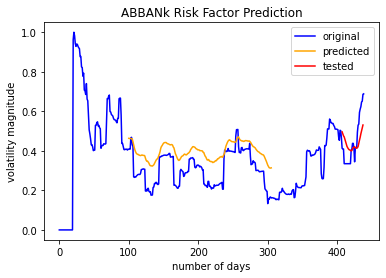

In [ ]:

### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(avgt)+look_back, :] = avgt
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(avgt)+(look_back*2)+1:len(df)-1, :] = avg
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df),color ='blue', label ='original')
plt.plot(trainPredictPlot, color ='orange', label ='predicted')
plt.plot(testPredictPlot , color ='red', label ='tested')
#plt.show()
plt.xlabel('number of days')
plt.ylabel('volatility magnitude')
plt.title('ABBANk Risk Factor Prediction')
plt.legend(loc='best')
plt.show(block=False)


In [ ]:

x_input=test_data[32:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<10):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

#print(lst_output)


[0.5754675]
101
1 day input [0.19637454 0.23595973 0.22257788 0.2173258  0.21473743 0.21418279
 0.21417837 0.21345271 0.21346281 0.22091394 0.22331182 0.22250533
 0.22434666 0.22436852 0.24559362 0.26787125 0.39495657 0.40315324
 0.40086805 0.39851429 0.40051879 0.3930397  0.37405126 0.37400227
 0.37894944 0.37857565 0.37882017 0.38140236 0.38436693 0.39265392
 0.4045641  0.40237512 0.40263621 0.40293339 0.42012897 0.41326988
 0.40716088 0.28425822 0.26030664 0.2580653  0.25977032 0.31616806
 0.4269634  0.42589926 0.42867864 0.46343664 0.51072293 0.51200998
 0.51044704 0.56087641 0.55477182 0.54202056 0.54105916 0.53837811
 0.53840698 0.52811939 0.52262389 0.50997041 0.50976193 0.50976193
 0.50865493 0.50687578 0.46974471 0.45346391 0.5040401  0.50224654
 0.46475357 0.41289481 0.40962568 0.40932475 0.33503132 0.33503132
 0.33503132 0.33503132 0.33503132 0.33503132 0.33503132 0.33503132
 0.33503132 0.33503132 0.40247704 0.40864274 0.43789422 0.43789422
 0.41266553 0.34444551 0.41492208 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,111)

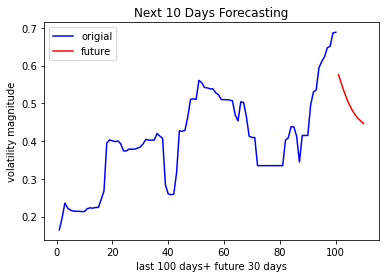

In [ ]:

plt.plot(day_new,scaler.inverse_transform(df[339:]),color ='blue', label ='origial')
plt.plot(day_pred,scaler.inverse_transform(lst_output),color='red', label='future')
plt.xlabel('last 100 days+ future 30 days')
plt.ylabel('volatility magnitude')
plt.title('Next 10 Days Forecasting')
plt.legend(loc='best')
plt.show(block=False)

In [ ]:
df3=df.tolist()
df3.extend(lst_output)
plt.xlabel('last 100 days+ future 30 days')
plt.ylabel('volatility magnitude')
plt.title('Next 30 Days Forecasting')
plt.plot(df3[409:],color='red', label='future')
plt.legend(loc='best')
plt.show(block=False)

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

In [ ]:
plt.plot(df3)